# Import

In [244]:
import pandas as pd

In [245]:
url = 'https://raw.githubusercontent.com/IrinaSing/challenge-collecting-data-immo/main/data/houses.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

    Location Property type Property subtype     Price      Type of sale  \
0   Verviers         HOUSE            HOUSE  296607.0  residential_sale   
1   Haasdonk         HOUSE            HOUSE  560000.0  residential_sale   
2      VIANE         HOUSE            HOUSE  299000.0  residential_sale   
3  Gerpinnes         HOUSE            HOUSE  300000.0  residential_sale   
4   Nivelles         HOUSE            HOUSE  195000.0  residential_sale   

   Number of bedrooms  Living area        Kitchen Furnished  Open fireplace  \
0                 3.0        130.0        Unknown     False           False   
1                 4.0          NaN        Unknown       NaN           False   
2                 5.0        200.0  SEMI_EQUIPPED     False           False   
3                 0.0        270.0        Unknown     False           False   
4                 3.0        135.0      INSTALLED     False           False   

   Terrace Terrace orientation   Garden Garden orientation  Surface area l

In [246]:
for each in df.columns:
    print(f"Number of {each}: {df[each].nunique()}")
    print(f"Options of {each}: {df[each].unique()}")
    print(f"Value counts: {df[each].value_counts()}")
    print()

Number of Location: 2112
Options of Location: ['Verviers' 'Haasdonk' 'VIANE' ... 'Libin (Villance)' 'Sars-la-Bruyère'
 'Neufchateau']
Value counts: Gent                                       143
Antwerp                                    128
Aalst                                       91
Brugge                                      87
Roeselare                                   82
                                          ... 
DION                                         1
Ramillies Geest-Gérompont-Petit-Rosière      1
Ormeignies                                   1
Hansbeke                                     1
Woluwe Saint Etienne                         1
Name: Location, Length: 2112, dtype: int64

Number of Property type: 2
Options of Property type: ['HOUSE' 'HOUSE_GROUP']
Value counts: HOUSE          9970
HOUSE_GROUP     112
Name: Property type, dtype: int64

Number of Property subtype: 15
Options of Property subtype: ['HOUSE' 'VILLA' 'APARTMENT_BLOCK' 'MIXED_USE_BUILDING' 'MANSION'

In [247]:
df.shape

(10082, 18)

In [248]:
df.columns.tolist()

['Location',
 'Property type',
 'Property subtype',
 'Price',
 'Type of sale',
 'Number of bedrooms',
 'Living area',
 'Kitchen',
 'Furnished',
 'Open fireplace',
 'Terrace',
 'Terrace orientation',
 'Garden',
 'Garden orientation',
 'Surface area land',
 'Number of facades',
 'Pool',
 'Condition']

In [249]:
# most expensive property price
# df['Price'].max()

In [250]:
# property price mean
# df['Price'].mean()

In [251]:
# Where is the most expensive property located?
# df['Price'].idxmax()

In [252]:
# City rating based on number of houses on sale 
df['Location'].value_counts()

Gent                                       143
Antwerp                                    128
Aalst                                       91
Brugge                                      87
Roeselare                                   82
                                          ... 
DION                                         1
Ramillies Geest-Gérompont-Petit-Rosière      1
Ormeignies                                   1
Hansbeke                                     1
Woluwe Saint Etienne                         1
Name: Location, Length: 2112, dtype: int64

In [253]:
df.sort_values('Price').head()

,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition
6468,Chimay,HOUSE,MIXED_USE_BUILDING,2500.0,residential_sale,0.0,NaN,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,452.0,3,False,TO_RENOVATE
7753,Herent,HOUSE,HOUSE,2500.0,residential_sale,5.0,1617.0,INSTALLED,False,False,True,Unknown,True,NORTH,3738.0,NaN,False,GOOD
6621,Deinze,HOUSE,HOUSE,2500.0,residential_sale,0.0,NaN,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,100.0,2,False,NaN
8635,Blaimont,HOUSE,BUNGALOW,10000.0,first_session_with_reserve_price,2.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,398.0,Unknown,NaN,Unknown
233,Erquelinnes Bersilliesl'Abbaye,HOUSE,BUNGALOW,14900.0,residential_sale,2.0,32.0,SEMI_EQUIPPED,False,False,True,Unknown,True,Unknown,200.0,4,False,GOOD


In [254]:
df.isnull().sum()

Location                  0
Property type             0
Property subtype          0
Price                   124
Type of sale              0
Number of bedrooms      112
Living area            2332
Kitchen                 797
Furnished              2998
Open fireplace            0
Terrace                   0
Terrace orientation       0
Garden                    0
Garden orientation        0
Surface area land       112
Number of facades      1559
Pool                   5154
Condition              2088
dtype: int64

In [255]:
# include only rows where price is not 0
df = df[df['Price'].notna()]
df.shape

(9958, 18)

In [256]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head(20)

,Location,Property_type,Property_subtype,Price,Type_of_sale,Number_of_bedrooms,Living_area,Kitchen,Furnished,Open_fireplace,Terrace,Terrace_orientation,Garden,Garden_orientation,Surface_area_land,Number_of_facades,Pool,Condition
0,Verviers,HOUSE,HOUSE,296607.0,residential_sale,3.0,130.0,Unknown,False,False,True,Unknown,True,Unknown,239.0,3,NaN,AS_NEW
1,Haasdonk,HOUSE,HOUSE,560000.0,residential_sale,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,626.0,3,NaN,AS_NEW
2,VIANE,HOUSE,HOUSE,299000.0,residential_sale,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,1150.0,NaN,NaN,GOOD
3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN
4,Nivelles,HOUSE,HOUSE,195000.0,residential_sale,3.0,135.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,165.0,2,False,NaN
5,Dinant,HOUSE,HOUSE,175000.0,residential_sale,3.0,128.0,INSTALLED,NaN,False,True,Unknown,Unknown,Unknown,260.0,2,NaN,NaN
6,Lierde,HOUSE,HOUSE,415000.0,residential_sale,3.0,207.0,HYPER_EQUIPPED,False,False,True,SOUTH_WEST,True,SOUTH_WEST,534.0,3,False,AS_NEW
7,Lierde,HOUSE,HOUSE,405000.0,residential_sale,3.0,207.0,HYPER_EQUIPPED,False,False,True,SOUTH_WEST,True,SOUTH_WEST,382.0,2,False,AS_NEW
8,Lierde,HOUSE,HOUSE,415000.0,residential_sale,3.0,207.0,HYPER_EQUIPPED,False,False,True,SOUTH_WEST,True,SOUTH_WEST,532.0,3,False,AS_NEW
9,BLAASVELD,HOUSE,HOUSE,415000.0,residential_sale,3.0,194.0,INSTALLED,False,False,Unknown,Unknown,True,SOUTH,457.0,2,NaN,NaN


In [257]:
# check unique value content
df.Property_type.unique()

array(['HOUSE'], dtype=object)

In [258]:
# exclude columns which are insignificant
df = df.drop(['Terrace_orientation','Garden_orientation', 'Property_type', 'Property_subtype', 'Type_of_sale', 'Number_of_facades', 'Kitchen'], axis=1) 
df.head()


,Location,Price,Number_of_bedrooms,Living_area,Furnished,Open_fireplace,Terrace,Garden,Surface_area_land,Pool,Condition
0,Verviers,296607.0,3.0,130.0,False,False,True,True,239.0,NaN,AS_NEW
1,Haasdonk,560000.0,4.0,NaN,NaN,False,Unknown,Unknown,626.0,NaN,AS_NEW
2,VIANE,299000.0,5.0,200.0,False,False,Unknown,Unknown,1150.0,NaN,GOOD
3,Gerpinnes,300000.0,0.0,270.0,False,False,True,True,498.0,False,NaN
4,Nivelles,195000.0,3.0,135.0,False,False,True,Unknown,165.0,False,NaN


In [259]:
df['Pool'] = df['Pool'].fillna(False)
df.Pool.unique()

array([False,  True])

In [260]:
df["Terrace"].replace({"Unknown": False}, inplace=True)
df.Terrace.unique()

array(['True', False], dtype=object)

In [261]:
df["Garden"].replace({"Unknown": False}, inplace=True)
df.Garden.unique()

array(['True', False], dtype=object)

In [262]:
df['Furnished'] = df['Furnished'].fillna(False)
df.Pool.unique()

array([False,  True])

In [263]:
df.head(10)

,Location,Price,Number_of_bedrooms,Living_area,Furnished,Open_fireplace,Terrace,Garden,Surface_area_land,Pool,Condition
0,Verviers,296607.0,3.0,130.0,False,False,True,True,239.0,False,AS_NEW
1,Haasdonk,560000.0,4.0,NaN,False,False,False,False,626.0,False,AS_NEW
2,VIANE,299000.0,5.0,200.0,False,False,False,False,1150.0,False,GOOD
3,Gerpinnes,300000.0,0.0,270.0,False,False,True,True,498.0,False,NaN
4,Nivelles,195000.0,3.0,135.0,False,False,True,False,165.0,False,NaN
5,Dinant,175000.0,3.0,128.0,False,False,True,False,260.0,False,NaN
6,Lierde,415000.0,3.0,207.0,False,False,True,True,534.0,False,AS_NEW
7,Lierde,405000.0,3.0,207.0,False,False,True,True,382.0,False,AS_NEW
8,Lierde,415000.0,3.0,207.0,False,False,True,True,532.0,False,AS_NEW
9,BLAASVELD,415000.0,3.0,194.0,False,False,False,True,457.0,False,NaN


In [264]:
# check unique value content
df.Condition.unique()

array(['AS_NEW', 'GOOD', nan, 'TO_RENOVATE', 'Unknown', 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [265]:
df.groupby('Condition')['Condition'].agg('count')

Condition
AS_NEW            1689
GOOD              2736
JUST_RENOVATED     488
TO_BE_DONE_UP     1039
TO_RENOVATE       1228
TO_RESTORE          56
Unknown            636
Name: Condition, dtype: int64

In [266]:
# unknown_kitchen_df = df.copy()
# unknown_kitchen_df[unknown_kitchen_df["Kitchen"] == 'Unknown'] 


In [267]:
df.isnull().sum()

Location                 0
Price                    0
Number_of_bedrooms       0
Living_area           2219
Furnished                0
Open_fireplace           0
Terrace                  0
Garden                   0
Surface_area_land        0
Pool                     0
Condition             2086
dtype: int64

In [268]:
df[df['Living_area'].isnull()]

,Location,Price,Number_of_bedrooms,Living_area,Furnished,Open_fireplace,Terrace,Garden,Surface_area_land,Pool,Condition
1,Haasdonk,560000.0,4.0,NaN,False,False,False,False,626.0,False,AS_NEW
10,Lede,549000.0,3.0,NaN,False,False,True,False,973.0,True,GOOD
25,Dendermonde,349000.0,3.0,NaN,False,False,False,False,139.0,False,NaN
40,Wuustwezel,950000.0,7.0,NaN,False,False,False,False,960.0,False,GOOD
42,TEMPLEUVE,315000.0,3.0,NaN,False,False,False,False,389.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10074,Boussu,80000.0,2.0,NaN,False,False,False,False,0.0,False,Unknown
10075,Roeselare,250000.0,4.0,NaN,False,False,False,True,165.0,False,GOOD
10077,Charleroi,220000.0,3.0,NaN,False,False,False,False,0.0,False,JUST_RENOVATED
10078,Gosselies,99000.0,2.0,NaN,False,False,False,False,80.0,False,TO_BE_DONE_UP


In [269]:
df.shape

(9958, 11)

In [270]:
count = df['Number_of_bedrooms'].value_counts()[0]
count

207

In [271]:
df = df.dropna()
df.shape

(6216, 11)

In [272]:
df.head(10)

,Location,Price,Number_of_bedrooms,Living_area,Furnished,Open_fireplace,Terrace,Garden,Surface_area_land,Pool,Condition
0,Verviers,296607.0,3.0,130.0,False,False,True,True,239.0,False,AS_NEW
2,VIANE,299000.0,5.0,200.0,False,False,False,False,1150.0,False,GOOD
6,Lierde,415000.0,3.0,207.0,False,False,True,True,534.0,False,AS_NEW
7,Lierde,405000.0,3.0,207.0,False,False,True,True,382.0,False,AS_NEW
8,Lierde,415000.0,3.0,207.0,False,False,True,True,532.0,False,AS_NEW
11,Lierde,415000.0,3.0,207.0,False,False,True,True,532.0,False,AS_NEW
13,Harelbeke,245000.0,3.0,161.0,False,False,False,False,353.0,False,GOOD
14,Zele,420000.0,3.0,196.0,False,False,False,False,350.0,False,AS_NEW
16,Frameries,90000.0,3.0,158.0,False,False,False,False,240.0,False,TO_RENOVATE
17,NEEROETEREN,369000.0,4.0,250.0,False,False,True,False,1341.0,True,GOOD


In [277]:
df = df[df.Condition != 'Unknown']


In [278]:
df.shape

(6023, 11)

In [279]:
# df[df.isin(['Unknown']).any(axis=1)]

,Location,Price,Number_of_bedrooms,Living_area,Furnished,Open_fireplace,Terrace,Garden,Surface_area_land,Pool,Condition


In [288]:
df.Surface_area_land.unique()

array([ 239., 1150.,  534., ..., 1572., 1468.,  839.])

In [281]:
df[df.Number_of_bedrooms > 10]

,Location,Price,Number_of_bedrooms,Living_area,Furnished,Open_fireplace,Terrace,Garden,Surface_area_land,Pool,Condition
26,Anzegem,1785000.0,13.0,1050.0,False,False,True,True,900.0,False,AS_NEW
47,Muizen,1250000.0,18.0,700.0,False,False,False,True,5000.0,False,GOOD
241,Zellik,1950000.0,15.0,640.0,False,False,True,False,987.0,False,GOOD
444,Eeklo,1900000.0,21.0,1075.0,False,False,True,False,0.0,False,GOOD
450,Bouillon,995000.0,17.0,800.0,False,False,True,True,5800.0,False,AS_NEW
527,Marche-en-Famenne,850000.0,20.0,1200.0,False,False,True,True,2800.0,False,AS_NEW
1098,Bruxelles,1350000.0,23.0,750.0,False,False,True,True,500.0,False,TO_RENOVATE
1445,Bruxelles,750000.0,13.0,500.0,False,False,True,True,320.0,False,TO_RENOVATE
1856,Deurne,795000.0,11.0,340.0,False,False,True,True,147.0,False,GOOD
2042,Schaerbeek,430000.0,11.0,410.0,False,False,True,False,326.0,False,TO_RENOVATE


C:\Users\Irina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Yeo Johnson, Skew: -0.042'}, ylabel='Density'>

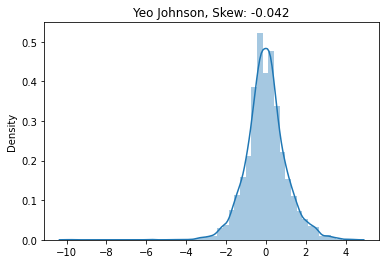

In [285]:
# approximation of the standard normal distribution via Yeo Johnson transformation

import scipy
from scipy import stats
from scipy.stats import skew
import sklearn.preprocessing as pre
import seaborn as sns
import matplotlib.pyplot as plt
pt = pre.PowerTransformer()
ptd = pt.fit_transform(df.Price.to_numpy().reshape(-1,1))
plt.title(f'Yeo Johnson, Skew: {stats.skew(ptd.squeeze()):.3f}')
sns.distplot(ptd, kde=True)

In [287]:
sns.plot(
    x='Living_area', 
    y='Number_of_bedrooms', 
    data=df)

AttributeError: module 'seaborn' has no attribute 'plot'

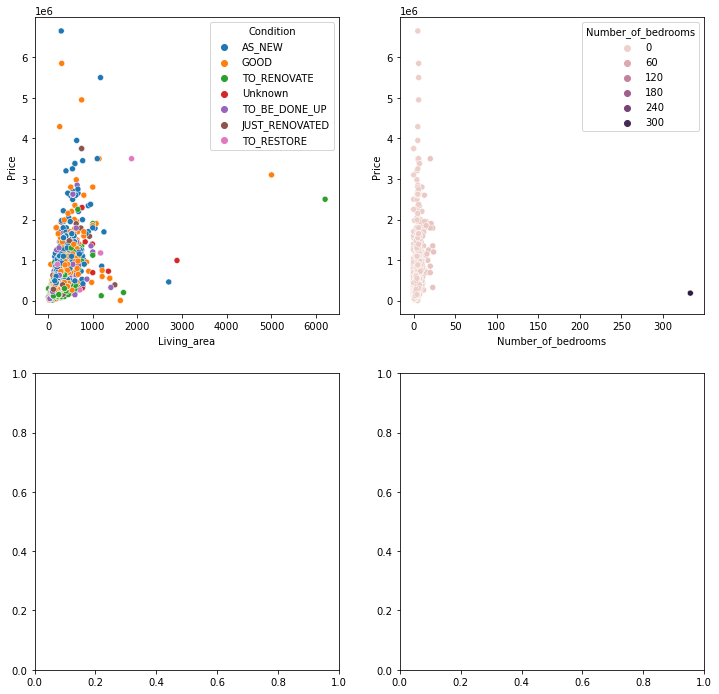

In [237]:
"""
fig, axes = plt.subplots(2,2, figsize=(12,12))
sns.scatterplot(
    x='Living_area', 
    y='Price', 
    hue='Condition', 
    data=df, ax=axes[0,0])

sns.scatterplot(
    x='Number_of_bedrooms', 
    y='Price', 
    hue='Number_of_bedrooms', 
    data=df, ax=axes[0,1])


plt.show()
"""

In [240]:
df.to_csv('clean_df')